In [ ]:
## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_path, study_results_path, on="Mouse ID")

# Display the data table for preview
combined_data.head(50)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   
20     x401    Capomulin  Female          16          15          0   
21     x401    Capomulin  Female          16          15          5   
22     x401    Capomulin  Female          16          15         10   
23     x401    Capomulin  Female          16          15         15   
24     x401    Capomulin  Female          16          15         20   
25     x401    Capomulin  Female          16          15         25   
26     x401    Capomulin  Female          16          15         30   
27     x401    Capomulin  Female          16          15         35   
28     x401    Capomulin  Female          16          15         40   
29     x401    Capomulin  Female          16          15         45   
30     m601    Capomulin    Male          22          17          0   
31     m601    Capomulin    Male          22          17          5   
32     m601    Capomulin    Male          22          17         10   
33     m601    Capomulin    Male          22          17         15   
34     m601    Capomulin    Male          22          17         20   
35     m601    Capomulin    Male          22          17         25   
36     m601    Capomulin    Male          22          17         30   
37     m601    Capomulin    Male          22          17         35   
38     m601    Capomulin    Male          22          17         40   
39     m601    Capomulin    Male          22          17         45   
40     g791     Ramicane    Male          11          16          0   
41     g791     Ramicane    Male          11          16          5   
42     g791     Ramicane    Male          11          16         10   
43     g791     Ramicane    Male          11          16         15   
44     g791     Ramicane    Male          11          16         20   
45     g791     Ramicane    Male          11          16         25   
46     g791     Ramicane    Male          11          16         30   
47     g791     Ramicane    Male          11          16         35   
48     g791     Ramicane    Male          11          16         40   
49     g791     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993               

In [2]:
# Checking the number of mice.
combined_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [64]:
#mouse id g989 shows 5 more entries than the others 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data['Mouse ID']. duplicated(keep=False), :]

#get data for the duplicate
print(combined_data.loc[combined_data['Mouse ID']=='g989'])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates()
clean_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1892 rows x 8 columns]

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method produces everything in a single groupby function
ms_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
ms_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
ms_variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
ms_standard_deviation = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
ms_sem =clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

table_mean_df = pd.DataFrame(ms_mean)
table_comp = table_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

table_comp.assign(Median=ms_median,Variance=ms_variance,Standard_deviation=ms_standard_deviation,SEM=ms_sem)

Mean     Median   Variance  Standard_deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.368318  50.909965  42.278090            6.502160  0.514041
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

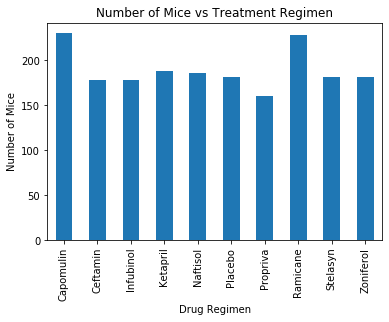

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barpd_data = clean_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data = barpd_data.plot.bar(rot='vertical',title='Number of Mice vs Treatment Regimen')

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Mice")

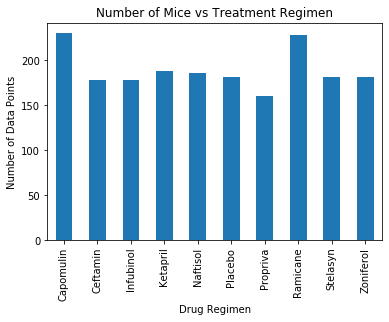

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
barpd_data = clean_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
barpd_data_df = pd.DataFrame(barpd_data)

plt.xdata = barpd_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Mice vs Treatment Regimen')

plt.show()



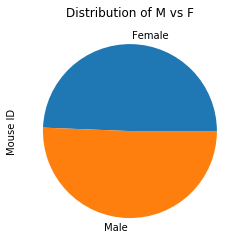

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data.groupby('Sex').count()['Mouse ID']

pie_plot = gender.plot.pie(y='Sex', title='Distribution of M vs F')


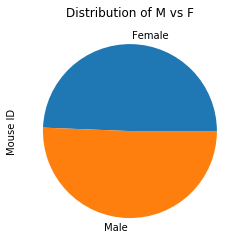

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_data.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df

plt.pie(gender,labels=gender.index);
plt.title('Distribution of M vs F')
plt.ylabel('Mouse ID')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Cap_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ram_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
Inf_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
Cef_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
Cap_max = Cap_df.groupby('Mouse ID').max()['Timepoint']
Cap_max_df = pd.DataFrame(Cap_max)

Ram_max = Ram_df.groupby('Mouse ID').max()['Timepoint']
Ram_max_df = pd.DataFrame(Ram_max)

Inf_max = Inf_df.groupby('Mouse ID').max()['Timepoint']
Inf_max_df = pd.DataFrame(Inf_max)

Cef_max = Cef_df.groupby('Mouse ID').max()['Timepoint']
Cef_max_df = pd.DataFrame(Cef_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Cap_max_merge = pd.merge(Cap_max_df, clean_data,on=("Mouse ID","Timepoint"), how="left")
Cap_max_merge.head()

Ram_max_merge = pd.merge(Ram_max_df, clean_data,on=("Mouse ID","Timepoint"), how="left")
Ram_max_merge.head()

Inf_max_merge = pd.merge(Inf_max_df, clean_data,on=("Mouse ID","Timepoint"), how="left")
Inf_max_merge.head()

Cef_max_merge = pd.merge(Cef_max_df, clean_data,on=("Mouse ID","Timepoint"), how="left")
Cef_max_merge.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a275         45     Ceftamin  Female          20          28   
1     b447          0     Ceftamin    Male           2          30   
2     b487         25     Ceftamin  Female           6          28   
3     b759         30     Ceftamin  Female          12          25   
4     f436         15     Ceftamin  Female           3          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           62.999356                 3  
1           45.000000                 0  
2           56.057749                 1  
3           55.742829                 1  
4           48.722078                 2

In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
colors = ["red", "blue", "darkgreen", "black"]
markers = ["o", "^", "s", "d" ]

# Create empty list to fill with tumor vol data (for plotting)

tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#Capomulin outliers
Cap_tumors = Cap_max_merge["Tumor Volume (mm3)"]

Cap_quartiles = Cap_tumors.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)
print(f"Capomulin potential outliers could be values below {Cap_lower_bound} and above {Cap_upper_bound} could be outliers.")
print(f"The interquartile range of Capomulin is: {Cap_iqr}")

#Ramicane Outliers
Ram_tumors = Ram_max_merge["Tumor Volume (mm3)"]

Ram_quartiles = Ram_tumors.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Ramicane potential outliers could be values below {Ram_lower_bound} and above {Ram_upper_bound} could be outliers.")   
print(f"The interquartile range of Ramicane is: {Ram_iqr}")

#Infubinol Outliers
Inf_tumors = Inf_max_merge["Tumor Volume (mm3)"]

Inf_quartiles = Inf_tumors.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Infubinol potential outliers could be values below {Inf_lower_bound} and above {Inf_upper_bound} could be outliers.")
print(f"The interquartile range of Infubinol is: {Inf_iqr}")

#Ceftamin Outliers
Cef_tumors = Cef_max_merge["Tumor Volume (mm3)"]

Cef_quartiles = Cef_tumors.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)
print(f"Ceftamin potential outliers could be values below {Cef_lower_bound} and above {Cef_upper_bound} could be outliers.")
print(f"The interquartile range of Ceftamin is: {Cef_iqr}")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
The interquartile range of Capomulin is: 7.781863460000004
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
The interquartile range of Ramicane is: 9.098536719999998
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
The interquartile range of Infubinol is: 11.477135160000003
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.
The interquartile range of Ceftamin is: 15.577752179999997


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Cap box plot


## Line and Scatter Plots

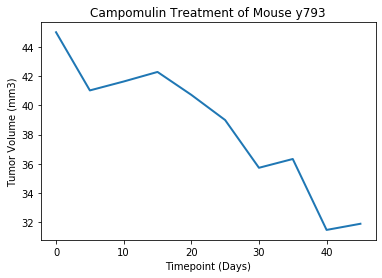

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
sline_df = Cap_df.loc[Cap_df["Mouse ID"] == "y793",:]

x_axis_tumplt = sline_df["Timepoint"]
Tum_vol = sline_df["Tumor Volume (mm3)"]

plt.title('Campomulin Treatment of Mouse y793')
plt.plot(x_axis_tumplt, Tum_vol, linewidth=2, markersize=10)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [20]:
#show data table for single mouse
sline_df = Cap_df.loc[Cap_df["Mouse ID"] == "y793",:]
sline_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
115     y793    Capomulin  Male          17          17          0   
116     y793    Capomulin  Male          17          17          5   
117     y793    Capomulin  Male          17          17         10   
118     y793    Capomulin  Male          17          17         15   
119     y793    Capomulin  Male          17          17         20   

     Tumor Volume (mm3)  Metastatic Sites  
115           45.000000                 0  
116           41.019913                 0  
117           41.630010                 1  
118           42.283665                 1  
119           40.716428                 2

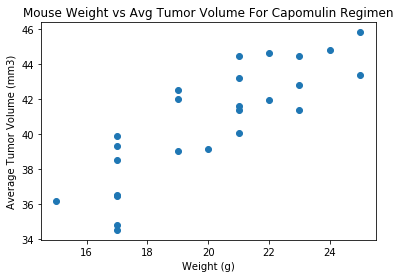

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Cap_df_average  = Cap_df.groupby(['Mouse ID']).mean()
plt.scatter(Cap_df_average['Weight (g)'], Cap_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume For Capomulin Regimen')
plt.show()

## Correlation and Regression

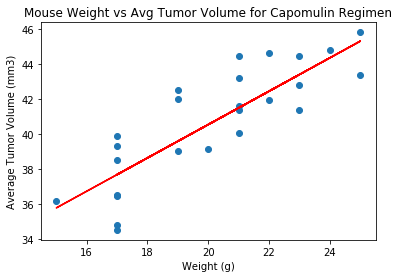

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

LR_model = st.linregress(Cap_df_average['Weight (g)'], Cap_df_average['Tumor Volume (mm3)'])
LR_model

LR_slope = 0.95
LR_intercept = 21.55

y_values = Cap_df_average['Weight (g)']*LR_slope+LR_intercept
plt.scatter(Cap_df_average['Weight (g)'], Cap_df_average ['Tumor Volume (mm3)'])

plt.plot(Cap_df_average['Weight (g)'], y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')

plt.show()
